<h1> Exploration </h1>

In [19]:
import pandas as pd
import os
import tqdm
from DataPreaparators import PreProcess

In [20]:
df = pd.read_csv('/home/student/filtered_train_data_combined.csv')
# std = pd.read_csv('stds_train_data.csv')

General Ploting Function

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, types, title=None, fsize = (20,20), sharex=False,sharey=False):
    fig,axes = plt.subplots(rows,cols, figsize=fsize,sharex=sharex,sharey=sharey)
    # fig.tight_layout(pad=3.0)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        type = types[i]
        # if col!='Label':
        if type=='hist':
            sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        if type=='dist':
            sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
            sns.distplot(df[df['Label']==0][col],ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='ts':
            axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r')
            axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b')
            axes[i].set_title(col+' change over time by label')
        elif type=='count':
            sns.countplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='box':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='boxen':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='bar':
                sns.barplot(x=col, y='ID', hue='Label', data=tmp, ax=axes[i])
                axes[i].set_title(f'{at} distribution')
                axes[i].get_legend().remove()
        # else:
        #     sns.histplot(x=col,data=df, color='g',ax=axes[i])
        #     axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

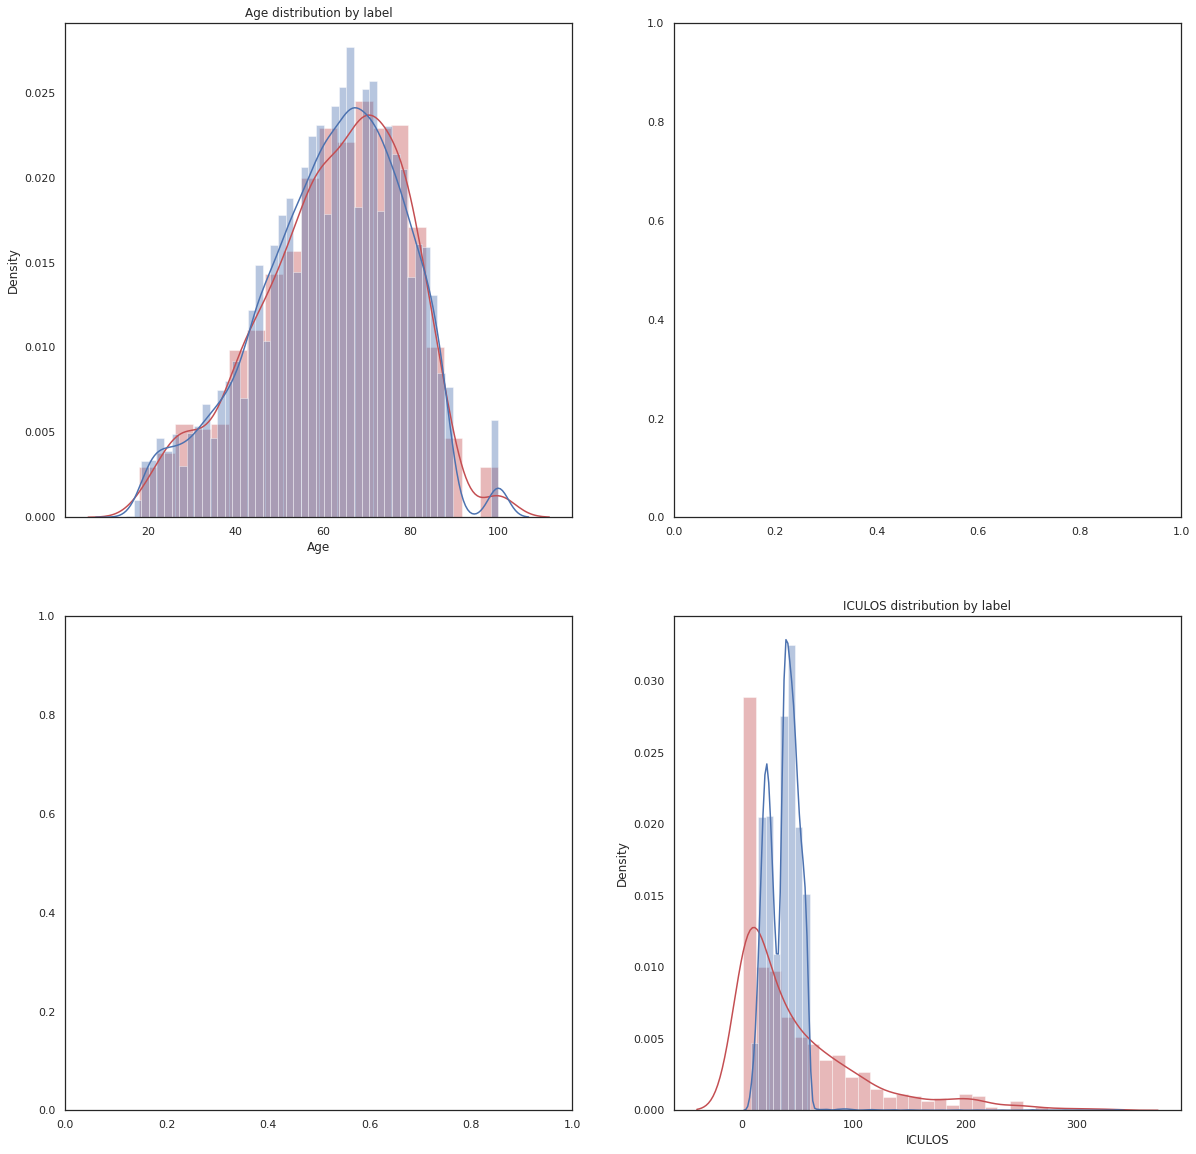

In [9]:
demo_cols = ['Age', 'Gender', 'Label', 'ICULOS']
demographic_df = df[demo_cols+['ID']].groupby(by='ID').max()
plot_results(2,2,demo_cols,demographic_df,types=['dist','cat','cat','dist'])

In [21]:
max_los = df[['ID','ICULOS']].groupby(by='ID').max().rename(columns={'ICULOS':'max_ICULOS'})
df=df.join(max_los,on='ID',how='left')
df['time_bm'] =  df['ICULOS']-df['max_ICULOS']

In [22]:
lab_attr= list(df.columns[9:35])
df_lab_attr_count = df[['ID','ICULOS']+lab_attr].groupby(by='ID').count()
df_lab_attr_count.describe()

,ICULOS,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,37.740850,2.040800,1.554000,3.078400,2.605600,2.080050,1.30285,0.592350,2.571700,0.586050,...,1.488250,3.500400,0.546550,0.363850,3.336850,2.77615,1.088900,2.401350,0.239550,2.225950
std,21.755171,4.525921,2.430201,6.204223,4.887979,3.925521,3.16606,1.188168,2.286093,1.197484,...,1.734823,3.569851,1.045891,0.991167,3.321451,2.57922,1.776332,2.095802,1.023239,1.804539
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,2.000000,2.00000,0.000000,2.000000,0.000000,2.000000
75%,47.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.00000,1.000000,3.000000,1.000000,...,2.000000,4.000000,1.000000,0.000000,4.000000,3.00000,2.000000,3.000000,0.000000,3.000000
max,336.000000,100.000000,49.000000,111.000000,106.000000,80.000000,79.00000,30.000000,47.000000,30.000000,...,30.000000,81.000000,29.000000,12.000000,61.000000,53.00000,35.000000,52.000000,28.000000,33.000000


In [23]:
missing = pd.DataFrame(df_lab_attr_count[(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==1)]) * 100)
missing[1] = missing_1[0]
missing

<ipython-input-23-b7605bda230a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing = pd.DataFrame(df_lab_attr_count[(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)


,0,1
ICULOS,8.896096,100.000000
Glucose,8.896096,16.073600
Fibrinogen,8.896096,0.859204
WBC,8.896096,6.727730
PTT,8.896096,3.671881
Hgb,8.896096,7.595039
Hct,8.896096,9.070276
TroponinI,8.896096,0.713301
Bilirubin_total,8.896096,1.613034
Potassium,8.896096,10.342871


<h2> Checking different window sizes</h2>

In [6]:
def add_rolling_window(df, attr, window_size):
    df = df.sort_values(by=['ID','ICULOS'], ascending =[True,True])
    rolling = df[['ID']+attr].groupby('ID').rolling(window=window_size, closed='both').count()
    rolling= rolling.rename(columns={at: f'{window_size}w_sum_{at}' for at in attr})
    rolling=rolling[list(rolling.columns)[1:]].reset_index().set_index('level_1')
    # rolling= rolling.rename(columns={'level_1': 'serial'})
    # df = df.reset_index().rename(columns={'index': 'serial'})
    combined = df.join(rolling,how='left', rsuffix= 'r')
    return combined, rolling

In [7]:
df_with_roll, roll = add_rolling_window(df, lab_attr, 5)

/data/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:2010: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(


KeyboardInterrupt: 

In [82]:
df_with_roll[df_with_roll['Label']==1][list(roll.columns)].describe()

,ID,5w_sum_BaseExcess,5w_sum_HCO3,5w_sum_FiO2,5w_sum_pH,5w_sum_PaCO2,5w_sum_SaO2,5w_sum_AST,5w_sum_BUN,5w_sum_Alkalinephos,...,5w_sum_Phosphate,5w_sum_Potassium,5w_sum_Bilirubin_total,5w_sum_TroponinI,5w_sum_Hct,5w_sum_Hgb,5w_sum_PTT,5w_sum_WBC,5w_sum_Fibrinogen,5w_sum_Platelets
count,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.00000,...,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000,70728.000000
mean,10839.391740,0.508851,0.323436,0.963452,0.626598,0.514450,0.261000,0.111017,0.453272,0.11072,...,0.301945,0.652641,0.095535,0.035375,0.549174,0.465912,0.213353,0.410120,0.052426,0.360338
std,5857.975134,0.972325,0.629905,1.138919,1.019002,0.844685,0.700724,0.361139,0.645716,0.36168,...,0.480885,0.815983,0.301693,0.192743,0.774969,0.702375,0.450758,0.627516,0.279561,0.527958
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11718.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15888.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,19977.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,4.000000,3.00000,...,4.000000,6.000000,2.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [12]:
df_with_roll[df_with_roll['Label']==0][list(roll.columns)].describe()

,ID,5w_sum_BaseExcess,5w_sum_HCO3,5w_sum_FiO2,5w_sum_pH,5w_sum_PaCO2,5w_sum_SaO2,5w_sum_AST,5w_sum_BUN,5w_sum_Alkalinephos,...,5w_sum_Phosphate,5w_sum_Potassium,5w_sum_Bilirubin_total,5w_sum_TroponinI,5w_sum_Hct,5w_sum_Hgb,5w_sum_PTT,5w_sum_WBC,5w_sum_Fibrinogen,5w_sum_Platelets
count,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,...,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000,684089.000000
mean,9955.258301,0.295291,0.228552,0.422724,0.378286,0.301687,0.195182,0.089178,0.387121,0.088139,...,0.219871,0.522755,0.083023,0.058109,0.506383,0.420733,0.162179,0.363124,0.035362,0.338706
std,5765.877541,0.803219,0.517292,0.910774,0.862746,0.722006,0.626405,0.308745,0.573948,0.306852,...,0.431321,0.715400,0.282203,0.248129,0.712060,0.635875,0.397117,0.567519,0.218559,0.507641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,19999.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000,4.000000,...,4.000000,6.000000,4.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


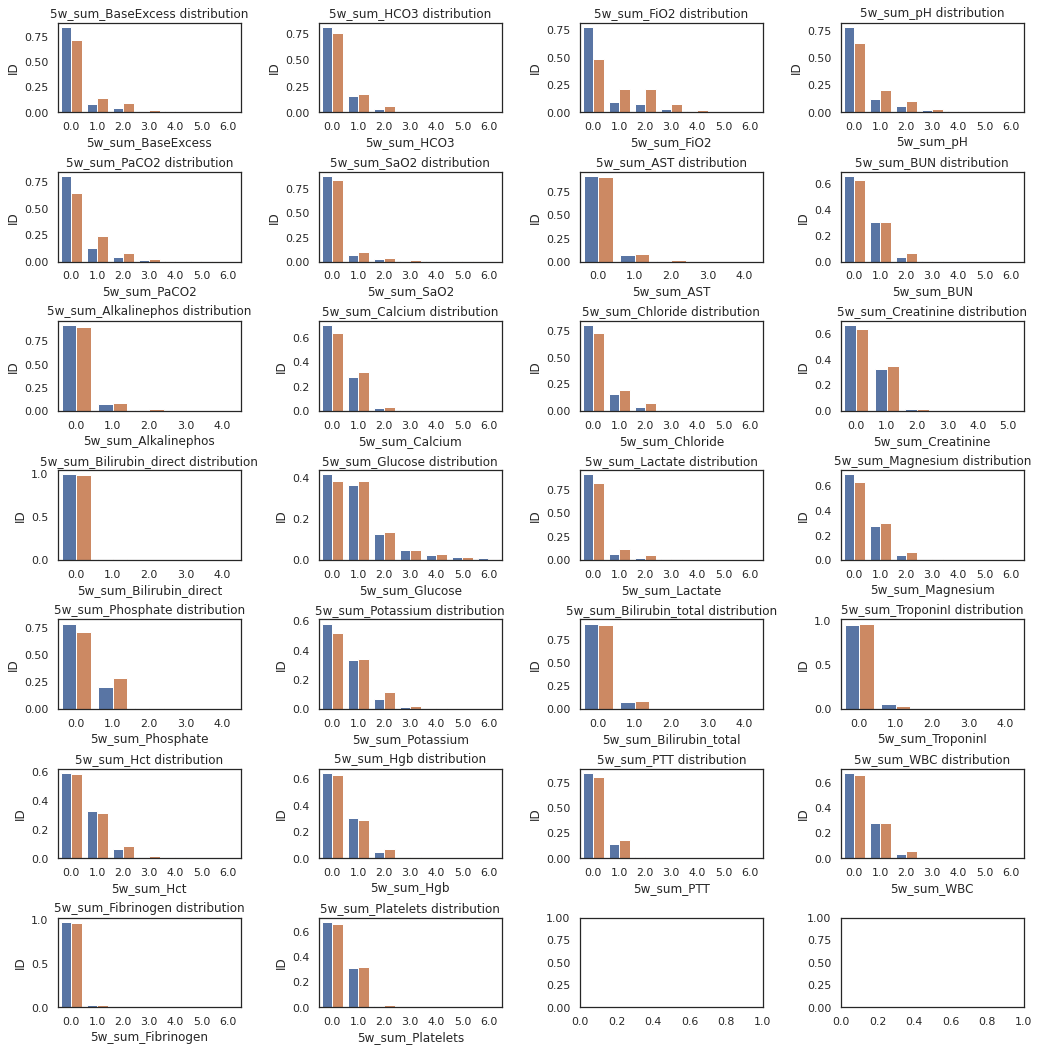

In [96]:
window_attr = list(roll.columns)[1:]
fig,axes = plt.subplots(7,4, figsize=(15,15))
fig.tight_layout(pad=3)
axes = axes.ravel()
sepsis_rows = df_with_roll[df_with_roll['Label']==1].shape[0]
non_sepsis_rows = df_with_roll[df_with_roll['Label']==0].shape[0]
for i,at in enumerate(window_attr):
    tmp = df_with_roll[['Label',at,'ID']].groupby(['Label',at], as_index=False).count().reset_index()
    tmp['ID'] = tmp.apply(lambda x: x['ID']/sepsis_rows if x['Label']==1 else  x.ID/non_sepsis_rows, axis=1)
    sns.barplot(x=at, y='ID', hue='Label', data=tmp, ax=axes[i])
    axes[i].set_title(f'{at} distribution')
    axes[i].get_legend().remove()

/data/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:2010: FutureWarning:

min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.



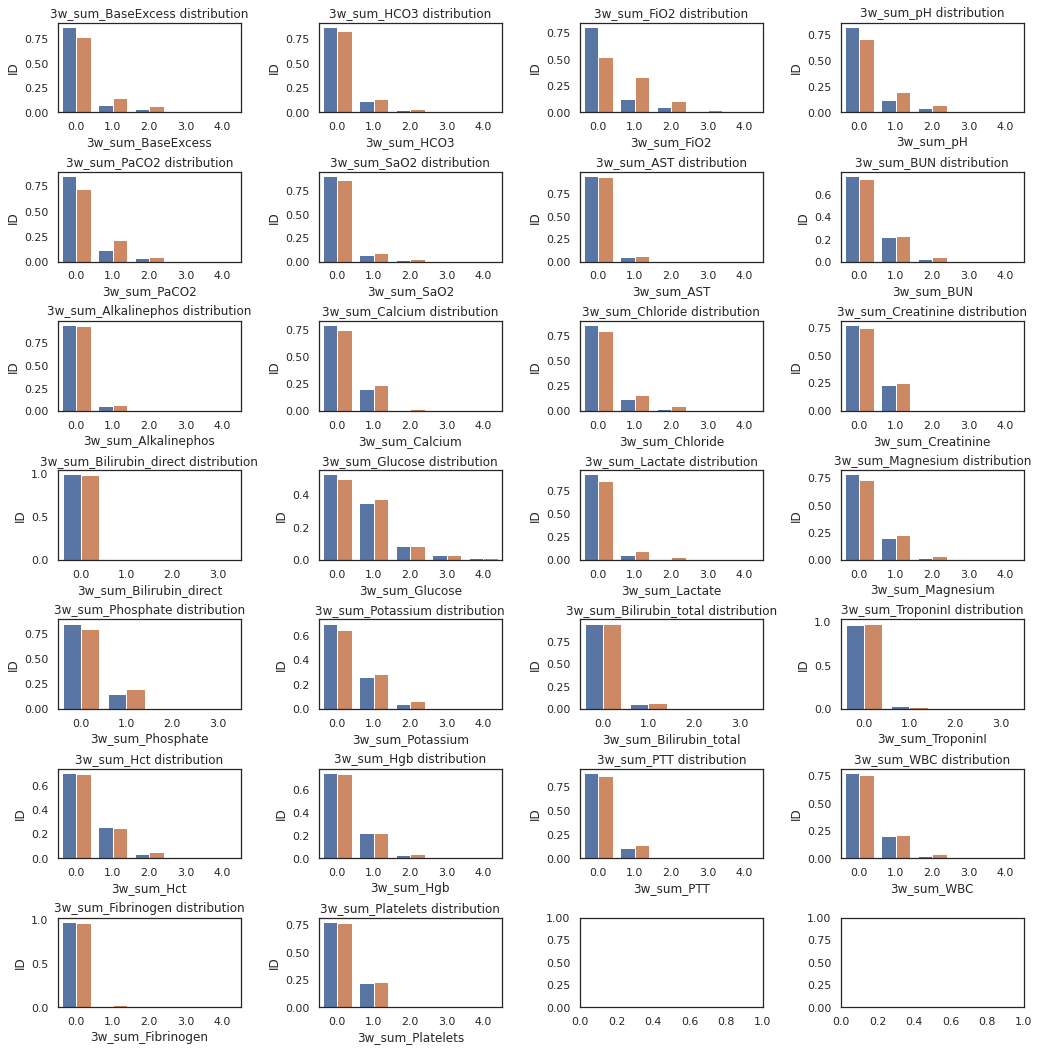

In [101]:
df_with_roll_3, roll_3 = add_rolling_window(df, lab_attr, 3)
window_attr = list(roll_3.columns)[1:]
fig,axes = plt.subplots(7,4, figsize=(15,15))
fig.tight_layout(pad=3)
axes = axes.ravel()
sepsis_rows = df_with_roll_3[df_with_roll['Label']==1].shape[0]
non_sepsis_rows = df_with_roll_3[df_with_roll['Label']==0].shape[0]
for i,at in enumerate(window_attr):
    tmp = df_with_roll_3[['Label',at,'ID']].groupby(['Label',at], as_index=False).count().reset_index()
    tmp['ID'] = tmp.apply(lambda x: x['ID']/sepsis_rows if x['Label']==1 else  x.ID/non_sepsis_rows, axis=1)
    sns.barplot(x=at, y='ID', hue='Label', data=tmp, ax=axes[i])
    axes[i].set_title(f'{at} distribution')
    axes[i].get_legend().remove()

In [24]:
processor = PreProcess(df,impute=False)
df_processed = processor.test_df

/data/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:2010: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/data/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/data/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/data/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [30]:
allcols = list(df_processed.columns)
window_cols = [x for x in allcols if '5w' in x]
freq_cols = [x for x in allcols if 'freq' in x]

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

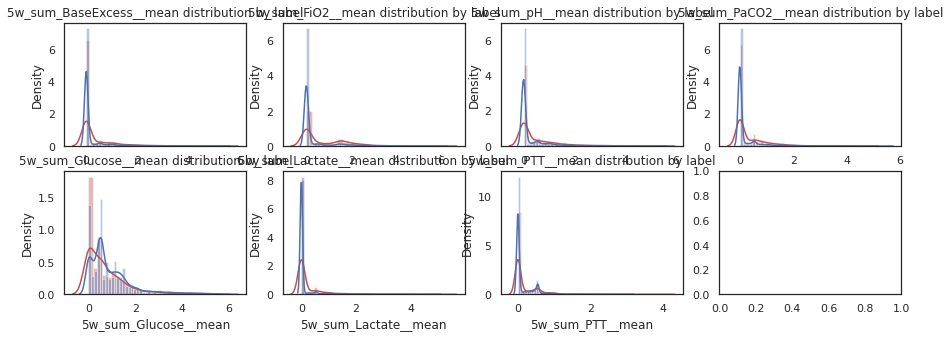

In [42]:
plot_results(4,2,window_cols,df_processed,types=['dist']*7, fsize=(15,5))

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

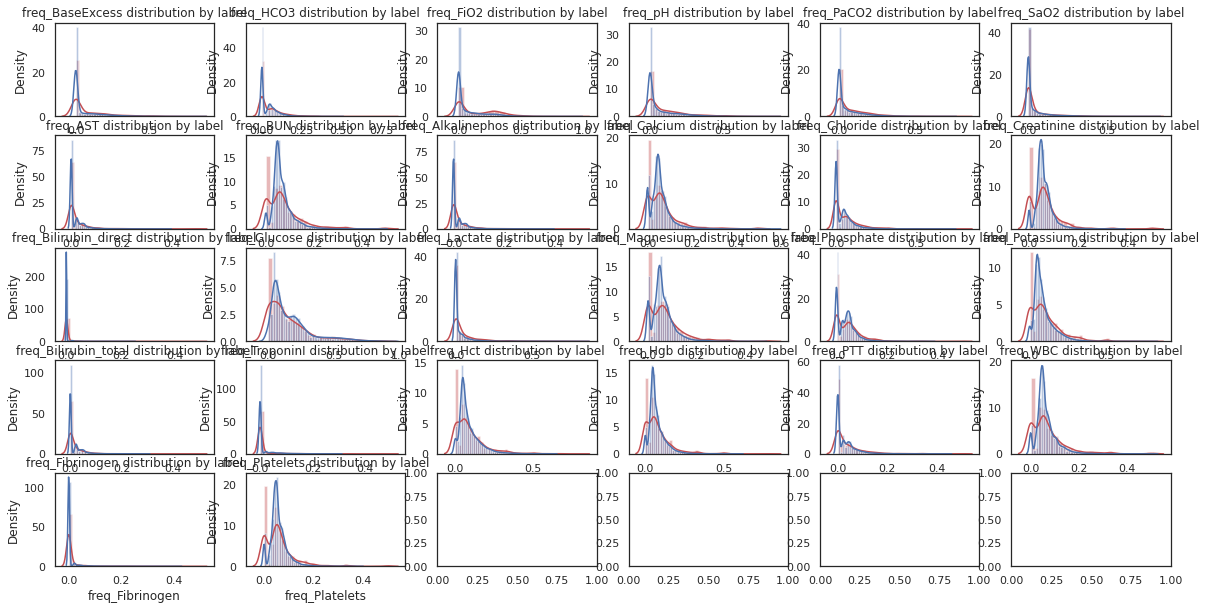

In [45]:
plot_results(6,5,freq_cols,df_processed,types=['dist']*30, fsize=(20,10))

<AxesSubplot:>

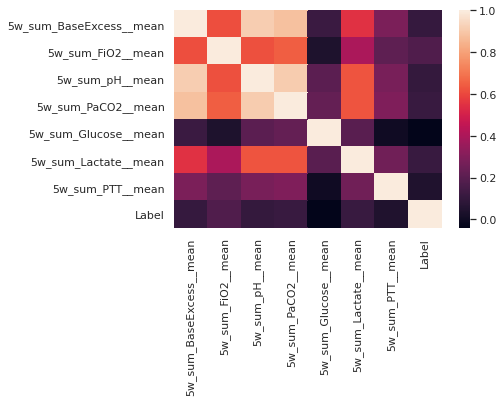

In [48]:
sns.heatmap(df_processed[window_cols+['Label']].corr())

In [60]:
df_processed.columns

Index(['ID', 'Label', 'max_ICULOS', 'Gender', 'SOFA__max', 'Unit1__max',
       'Unit2__max', 'Unit3__max', 'HR__median', 'HR__max', 'HR__std',
       'MAP__median', 'MAP__min', 'O2Sat__mean', 'O2Sat__std', 'Resp__median',
       'Resp__max', 'Resp__std', 'SBP__median', 'SBP__min', 'SBP__std',
       'Hct__median', 'Hct__min', 'Potassium__mean', 'Glucose__mean',
       'Glucose__std', 'Temp__mean', 'Temp__min', 'DBP__mean', 'WBC__median',
       'WBC__min', 'WBC__std', 'EtCO2__mean', 'BaseExcess__mean', 'HCO3__mean',
       'FiO2__mean', 'FiO2__std', 'SaO2__mean', 'AST__mean', 'Lactate__mean',
       'Magnesium__mean', 'Phosphate__mean', 'TroponinI__mean', 'Hgb__mean',
       'PTT__mean', 'Platelets__mean', 'Age__mean', 'HospAdmTime__mean',
       'pH__std', 'pH__median', '5w_sum_BaseExcess__mean', '5w_sum_FiO2__mean',
       '5w_sum_pH__mean', '5w_sum_PaCO2__mean', '5w_sum_Glucose__mean',
       '5w_sum_Lactate__mean', '5w_sum_PTT__mean', 'freq_BaseExcess',
       'freq_HCO3', 'freq_F

In [67]:
allcols[49]

'pH__median'

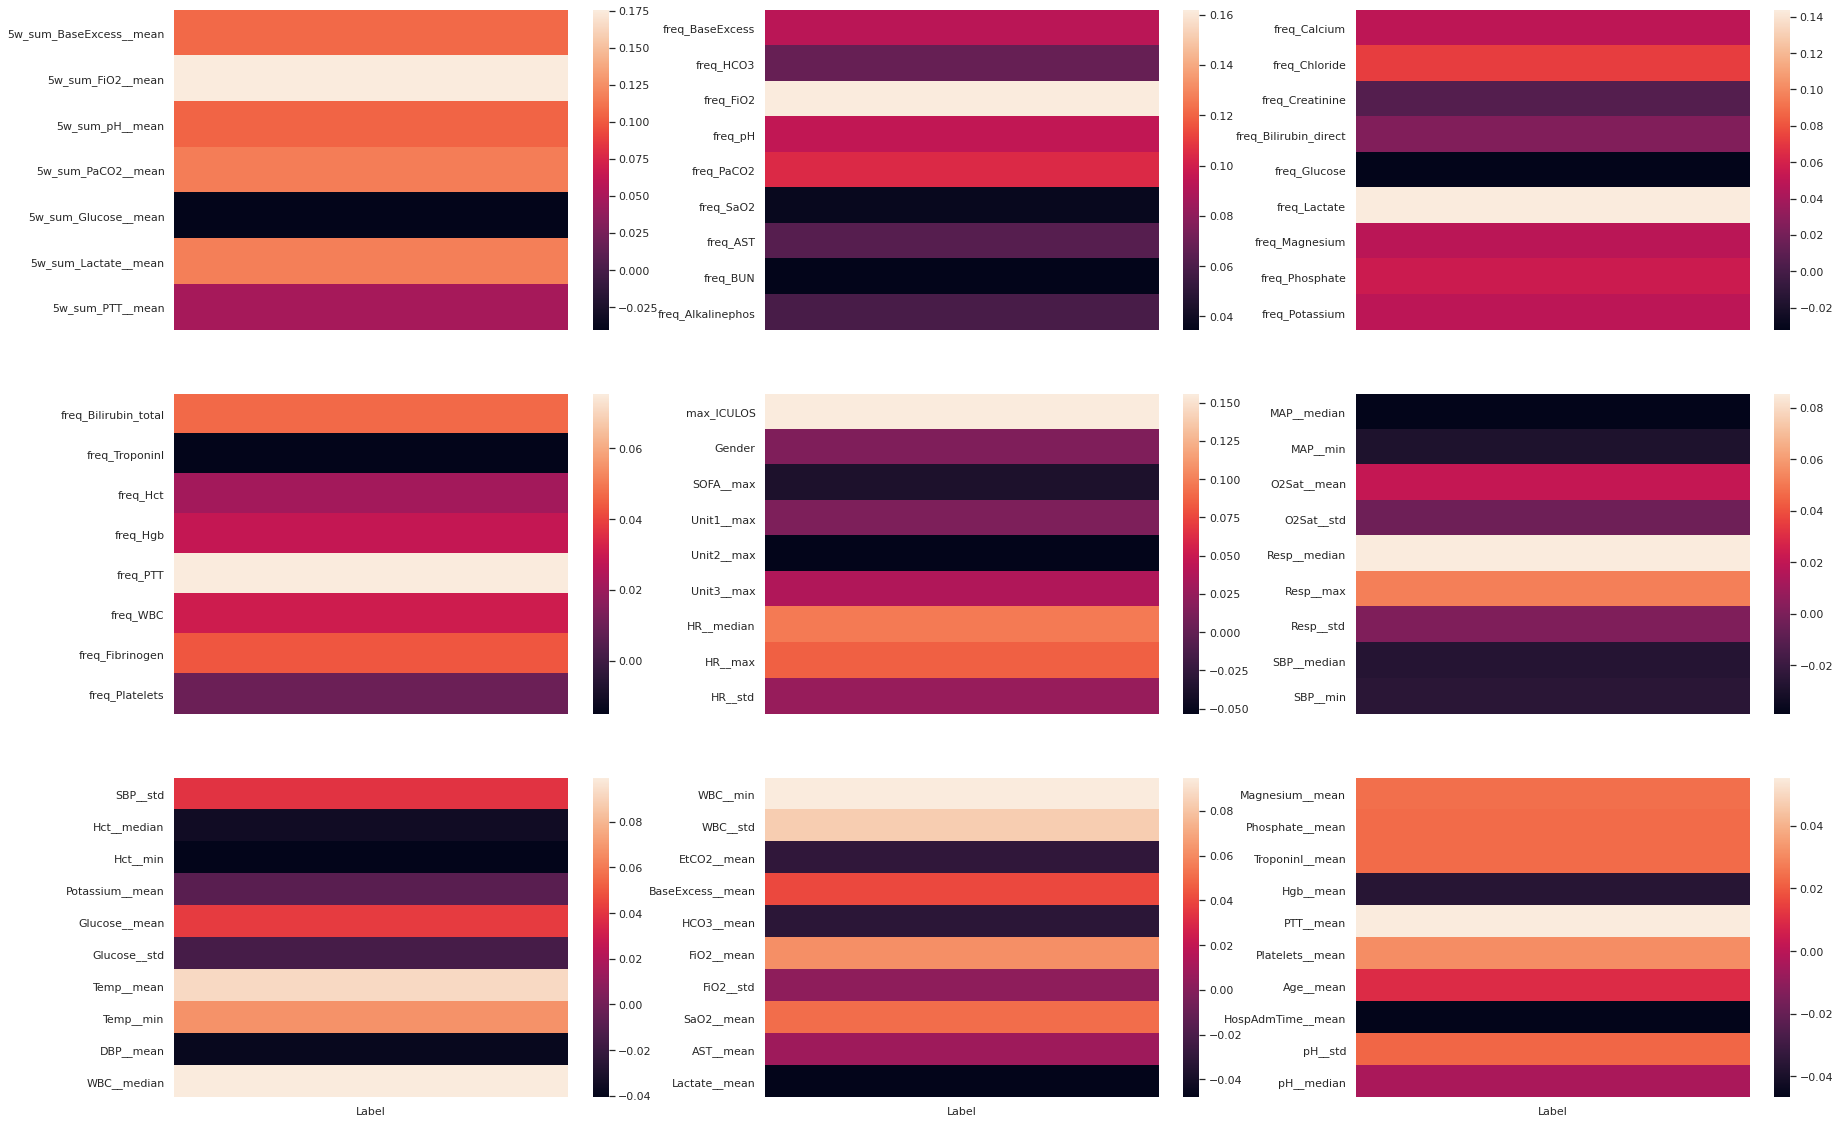

In [78]:
list_of_lists =[window_cols,freq_cols[:9],freq_cols[9:18],freq_cols[18:],allcols[2:11],allcols[11:20],allcols[20:30],allcols[30:40],allcols[40:50]]
fig,axes = plt.subplots(3,3, figsize=(30,20),sharex=True)
axes = axes.ravel()
for i,l in enumerate(list_of_lists):
    tmp = df_processed[l+['Label']].corr()[['Label']]
    tmp = tmp[tmp.index!='Label']
    sns.heatmap(tmp, ax=axes[i])

In [98]:
from scipy.stats import ttest_ind
same = []
not_same = []
for feature in allcols:
    if feature not in ['Label','ID','Gender']:
        sepsis =list(df_processed[(df_processed['Label']==1)][feature].values)
        not_sepsis =list(df_processed[(df_processed['Label']==0)][feature].values)
        if 'HR' in feature or 'resp' in feature: ## HR is greater when a patient has sepsis
            alterantive = 'greater'
        if 'SBP' in feature:
            alterantive = 'less'
        else:
            alterantive = 'two-sided'
        stat,p = ttest_ind(sepsis,not_sepsis, equal_var=False,alternative=alterantive )
        # print(f'** {feature} **')
        if p<0.05:
            not_same.append(feature)
        else:
            same.append(feature)
print('Reject Null Hypothesis For')
print(not_same)
print('Accept Null Hypothesis For')
print(same)

Reject Null Hypothesis For
['max_ICULOS', 'SOFA__max', 'Unit2__max', 'Unit3__max', 'HospAdmTime__mean', '5w_sum_BaseExcess__mean', '5w_sum_FiO2__mean', '5w_sum_pH__mean', '5w_sum_PaCO2__mean', '5w_sum_Glucose__mean', '5w_sum_Lactate__mean', '5w_sum_PTT__mean', 'freq_BaseExcess', 'freq_HCO3', 'freq_FiO2', 'freq_pH', 'freq_PaCO2', 'freq_SaO2', 'freq_AST', 'freq_BUN', 'freq_Alkalinephos', 'freq_Calcium', 'freq_Chloride', 'freq_Glucose', 'freq_Lactate', 'freq_Magnesium', 'freq_Phosphate', 'freq_Potassium', 'freq_Bilirubin_total', 'freq_Hct', 'freq_Hgb', 'freq_PTT', 'freq_WBC', 'freq_Fibrinogen']
Accept Null Hypothesis For
['Unit1__max', 'HR__median', 'HR__max', 'HR__std', 'MAP__median', 'MAP__min', 'O2Sat__mean', 'O2Sat__std', 'Resp__median', 'Resp__max', 'Resp__std', 'SBP__median', 'SBP__min', 'SBP__std', 'Hct__median', 'Hct__min', 'Potassium__mean', 'Glucose__mean', 'Glucose__std', 'Temp__mean', 'Temp__min', 'DBP__mean', 'WBC__median', 'WBC__min', 'WBC__std', 'EtCO2__mean', 'BaseExcess__

In [96]:
from scipy.stats import ttest_ind
same = []
not_same = []
for feature in allcols:
    if feature not in ['Label','ID']:
        sepsis =list(df_processed[(df_processed['Label']==1)][feature].values)
        not_sepsis =list(df_processed[(df_processed['Label']==0)][feature].values)
        if 'HR' in feature or 'resp' in feature: ## HR is greater when a patient has sepsis
            alterantive = 'greater'
        if 'SBP' in feature:
            alterantive = 'less'
        else:
            alterantive = 'two-sided'
        stat,p = ttest_ind(sepsis,not_sepsis, equal_var=True,alternative=alterantive )
        # print(f'** {feature} **')
        if p<0.05:
            not_same.append(feature)
        else:
            same.append(feature)
print('Reject Null Hypothesis For')
print(not_same)
print('Accept Null Hypothesis For')
print(same)

Reject Null Hypothesis For
['max_ICULOS', 'Gender', 'SOFA__max', 'Unit2__max', 'Unit3__max', 'HospAdmTime__mean', '5w_sum_BaseExcess__mean', '5w_sum_FiO2__mean', '5w_sum_pH__mean', '5w_sum_PaCO2__mean', '5w_sum_Glucose__mean', '5w_sum_Lactate__mean', '5w_sum_PTT__mean', 'freq_BaseExcess', 'freq_HCO3', 'freq_FiO2', 'freq_pH', 'freq_PaCO2', 'freq_SaO2', 'freq_AST', 'freq_BUN', 'freq_Alkalinephos', 'freq_Calcium', 'freq_Chloride', 'freq_Bilirubin_direct', 'freq_Glucose', 'freq_Lactate', 'freq_Magnesium', 'freq_Phosphate', 'freq_Potassium', 'freq_Bilirubin_total', 'freq_TroponinI', 'freq_Hct', 'freq_Hgb', 'freq_PTT', 'freq_WBC', 'freq_Fibrinogen']
Accept Null Hypothesis For
['Unit1__max', 'HR__median', 'HR__max', 'HR__std', 'MAP__median', 'MAP__min', 'O2Sat__mean', 'O2Sat__std', 'Resp__median', 'Resp__max', 'Resp__std', 'SBP__median', 'SBP__min', 'SBP__std', 'Hct__median', 'Hct__min', 'Potassium__mean', 'Glucose__mean', 'Glucose__std', 'Temp__mean', 'Temp__min', 'DBP__mean', 'WBC__median',

In [93]:
import numpy as np
sepsis =list(df_processed[(df_processed['Label']==1)]['Gender'].values)
not_sepsis =list(df_processed[(df_processed['Label']==0)]['Gender'].values)
print(np.mean(sepsis))
print(np.mean(not_sepsis))
ttest_ind(sepsis,not_sepsis, equal_var=True,alternative='two-sided')

0.5809187279151944
0.5535647027172451


Ttest_indResult(statistic=1.996224507163574, pvalue=0.04592302601658897)

In [103]:
from scipy.stats import ttest_ind
for feature in window_attr:
    sepsis =list(df_with_roll_3[(df_with_roll_3['Label']==1)][feature].values)
    not_sepsis =list(df_with_roll_3[(df_with_roll_3['Label']==0)][feature].values)
    stat,p = ttest_ind(sepsis,not_sepsis)
    if p<=0.05:
        print(f'** {feature} **')
        print('Not the same Distribution')

In [ ]:
df_with_roll_6, roll_6 = add_rolling_window(df, lab_attr, 6)
window_attr = list(roll_6.columns)[1:]
fig,axes = plt.subplots(7,4, figsize=(15,15))
fig.tight_layout(pad=3)
axes = axes.ravel()
sepsis_rows = df_with_roll_6[df_with_roll['Label']==1].shape[0]
non_sepsis_rows = df_with_roll_6[df_with_roll['Label']==0].shape[0]
for i,at in enumerate(window_attr):
    tmp = df_with_roll_6[['Label',at,'ID']].groupby(['Label',at], as_index=False).count().reset_index()
    tmp['ID'] = tmp.apply(lambda x: x['ID']/sepsis_rows if x['Label']==1 else  x.ID/non_sepsis_rows, axis=1)
    sns.barplot(x=at, y='ID', hue='Label', data=tmp, ax=axes[i])
    axes[i].set_title(f'{at} distribution')
    axes[i].get_legend().remove()

/data/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:2010: FutureWarning:

min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.



In [ ]:
from scipy.stats import ttest_ind
for feature in window_attr:
    sepsis =list(df_with_roll_6[(df_with_roll_3['Label']==1)][feature].values)
    not_sepsis =list(df_with_roll_6[(df_with_roll_3['Label']==0)][feature].values)
    stat,p = ttest_ind(sepsis,not_sepsis)
    if p>0.05:
        print(f'** {feature} **')
        print('Not the same Distribution')

In [ ]:
missing = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==1)]) * 100)
missing[1] = missing_1[0]